# Show function

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show(*images):
    for i in images:
        image = cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        plt.show()


# Detector

In [2]:
import cv2
import numpy as np

def detector_samples(paths):
    kpts = {}
    dscpt = {}
    orb = cv2.ORB.create()
    
    for p in paths:
        img = cv2.imread(p)
        kpts[p], dscpt[p] = orb.detectAndCompute(img, None)
    
    return kpts, dscpt

In [3]:
def detector_test(path):
    
    img = cv2.imread(path)
    orb = cv2.ORB.create()
    kpts, dscpt = orb.detectAndCompute(img, None)
   
    return kpts, dscpt

# Matcher

In [4]:
def matching_criterion(matches):
    num = 0
    
    for m, n in matches:
        if m.distance < 0.6 *n.distance:
            num +=1
    
    print(num)
    return num

In [5]:
def matcher(kpts, dscpt, path_to_test, show_matches=False):

    kpts_test, dscpt_test = detector_test(path_to_test)
    bf = cv2.BFMatcher(cv2.NORM_HAMMING)

    matches = {}
    for key in dscpt.keys():
        matches[key] = bf.knnMatch(dscpt[key], dscpt_test, k=2)
    label = max(matches, key=lambda k: matching_criterion(matches[k]))
    print(label)

    if show_matches:
        img_matches = cv2.drawMatchesKnn(cv2.imread(label), kpts[label], cv2.imread(path_to_test), kpts_test, matches[label], cv2.imread(path_to_test), flags = cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
        show(img_matches)

    return matches        

# Database creation

In [6]:
#"training"
kpts, dscpt = detector_samples(["samples/strings.png", "samples/keyboards.png", "samples/mixer.png"])

# Test on samples

25
0
0
samples/strings.png


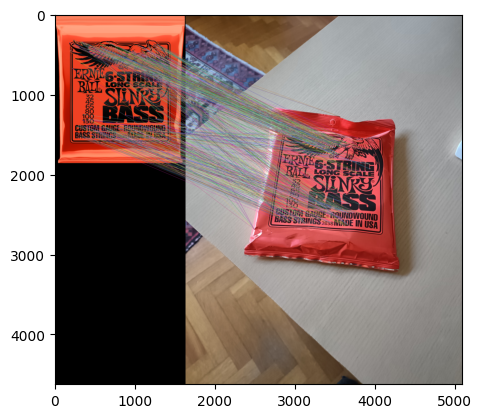

In [7]:
#matching
matches = matcher(kpts, dscpt, "test/strings.jpg", show_matches=True)

# Professor's solution

In [8]:
import cv2
import numpy as np

## Plot the images

In [9]:
images = []

img = cv2.imread('samples/strings.png')
images.append(img)
img = cv2.imread('samples/mixer.png')
images.append(img)
img = cv2.imread('samples/keyboards.png')
images.append(img)

classes = ['strings', 'mixer', 'keyboards']

## Descriptors database

In [12]:
def descriptorsDB(images):
    descriptors_list = []
    orb = cv2.ORB.create(nfeatures=500)     #it is possible to specify the number of features
                                            #however, this may lead to the duplication of some of those
    for img in images:
        kpt, des = orb.detectAndCompute(img, None)
        descriptors_list.append(des)
    return descriptors_list

## Match function

In [18]:
def objClassification(img, descriptor_list):
    orb = cv2.ORB.create()
    kpt, des = orb.detectAndCompute(img, None)

    matcher = cv2.BFMatcher(cv2.NORM_HAMMING)
    best_matches = []
    classID = -1

    for dsc in descriptor_list:
        matches = matcher.knnMatch(dsc, des, k = 2)
        good = []
        for m, n in matches:
            if m.distance < 0.6 * n.distance:
                good.append([m])
        best_matches.append(good)

    if len(best_matches) > 0:
        max_value = max(best_matches, key=len)           #selects the array of maximum length
        classID = best_matches.index(max_value)

    return classID

## Main program

In [31]:
descriptor_list = descriptorsDB(images=images)
webcam = cv2.VideoCapture(0)

while True:
    ret, frame = webcam.read()
    class_id = objClassification(frame, descriptor_list)

    if class_id != -1:      #this method is useful to write text to the video frame
        cv2.putText(frame, classes[class_id], (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 4)
        k = cv2.waitKey(10)
        if k == ord('q'):
            break
    else:
        cv2.putText(frame, "Error", (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 4)
        k = cv2.waitKey(10)
        if k == ord('q'):
            break

[ WARN:0@2712.312] global cap_v4l.cpp:997 open VIDEOIO(V4L2:/dev/video0): can't open camera by index
[ERROR:0@2712.314] global obsensor_uvc_stream_channel.cpp:159 getStreamChannelGroup Camera index out of range


error: OpenCV(4.9.0) /io/opencv/modules/core/src/batch_distance.cpp:274: error: (-215:Assertion failed) type == src2.type() && src1.cols == src2.cols && (type == CV_32F || type == CV_8U) in function 'batchDistance'
